<a href="https://colab.research.google.com/github/robertoricci/Curso-Data-Science-com-Python---Banco-MODAL/blob/main/Python_para_Traders_M%C3%B3dulo_02_An%C3%A1lise_tecnica_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nesse código iremos aplicar os principais indicadores de análise técnica com Python através das bibliotecas:
- Plotly - biblioteca para visualização de gráficos dinâmicos
- TALib - biblioteca que calcula os indicadores de análise técnica em um frammework amigável para programadores
- Investpy - captura de dados tratados de preço de abertura, fechamento, máxima, mímina e volume do mercado financeiro via API encapsulada em funções. 

##1. Instalando Bibliotecas

O comando !pip install instala as bibliotecas e todas suas dependências

In [ ]:
!pip install ta
!pip install investpy
!pip install plotly

##2. Importando bibliotecas

Nessa seção iremos importar as bibliotecas para construção das análises. Observem que importamos também dois submódulos da biblioteca Plotly: graph objects para construção dos gráficos dinâmicos e make_subplots para quando precisarmos utilizar dois gráficos na mesma figura.

In [3]:
import ta
import investpy
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

##3. Capturando Dados

Iremos capturar os dados através da biblioteca investpy e traremos 3 ações diferentes para observarmos diferentes comportamentos dos indicadores

In [4]:
#DF 1 - BRMalls

df = investpy.get_stock_historical_data(stock='BRML3', country='Brazil', from_date='01/01/2019', to_date='10/06/2022')

In [5]:
df

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2019-01-02,12.22,12.63,12.12,12.59,14193800,BRL
2019-01-03,12.48,12.68,12.36,12.67,9265200,BRL
2019-01-04,12.55,12.71,12.43,12.43,11161000,BRL
2019-01-07,12.31,12.44,12.14,12.35,4569500,BRL
2019-01-08,12.40,12.44,12.25,12.37,4509200,BRL
...,...,...,...,...,...,...
2022-06-06,8.44,8.50,8.24,8.29,12715700,BRL
2022-06-07,8.25,8.51,8.08,8.45,16843100,BRL
2022-06-08,8.38,8.66,8.32,8.54,12521100,BRL


In [7]:
#DF2 - Petrobrás

df2 = investpy.get_stock_historical_data(stock='PETR4', country='Brazil', from_date='01/01/2019', to_date='10/06/2022')

df2

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2019-01-02,21.83,23.42,21.57,23.29,104534800,BRL
2019-01-03,23.55,24.02,23.04,23.86,95206400,BRL
2019-01-04,24.05,24.14,23.69,23.93,72119800,BRL
2019-01-07,24.05,25.09,23.91,24.30,121711904,BRL
2019-01-08,24.59,24.61,23.98,24.16,68761800,BRL
...,...,...,...,...,...,...
2022-06-06,30.50,30.53,29.91,30.30,38952200,BRL
2022-06-07,30.19,31.30,30.16,30.66,79944304,BRL
2022-06-08,30.42,31.15,30.33,30.51,65723800,BRL


In [9]:
#DF3 - WEG Industries

df3 = investpy.get_stock_historical_data(stock='WEGE3', country='Brazil', from_date='01/01/2019', to_date='30/03/2021')

df3

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2019-01-02,8.52,8.79,8.46,8.69,4751200,BRL
2019-01-03,8.73,8.89,8.56,8.89,8316400,BRL
2019-01-04,8.90,9.03,8.70,8.99,8340200,BRL
2019-01-07,9.07,9.07,8.80,8.85,5860200,BRL
2019-01-08,8.88,8.91,8.72,8.78,6306800,BRL
...,...,...,...,...,...,...
2021-03-24,35.70,36.28,34.94,35.07,16129600,BRL
2021-03-25,35.07,35.57,34.72,35.34,11509400,BRL
2021-03-26,35.40,36.58,35.30,36.17,11053600,BRL


##4. Estrutura de programação da Plotly

###4.1. Gráficos  de linhas

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='PETR4', x=df2.index, y=df2['Close'],text='Close'))
fig.update_layout(title_text='Gráfico de Linhas',template = 'simple_white', )
fig.show()


###4.2. Gráfico de candlestick

In [24]:
fig = go.Figure()
fig.add_trace(go.Candlestick(name='BRML3', x=df.index, close=df['Close'], open=df['Open'], high = df['High'], low=df['Low']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='Gráfico de Candlestick')
fig.show()

###4.3. Gráfico de barras


In [27]:
fig = go.Figure()
fig.add_trace(go.Ohlc(name='BRML3', x=df.index, close=df['Close'], open=df['Open'], high = df['High'], low=df['Low']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='Gráfico de Barras')
fig.show()

##5. Indicadores

Nesta seção dividiremos em:

- Indicadores de momentum
- Indicadores de volatilidade
- Indicadores de tendência
- Indicadores de volume
- Osciladores

##5.1. Indicadores de Momentum

Momentum é um conceito da física que mede a taxa de aumento ou diminuicação de velocidade de um objeto. Na análise técnica o mesmo conceito é aplicado aos preços buscando entender se uma tendência está em aceleração ou desaceleração.

###5.1.1. Rate of Change

In [28]:
#Importando da biblioteca TA o indicador

from ta.momentum import ROCIndicator

In [32]:
#Adicionando o indicador ao dataframe

roc = ROCIndicator(df['Close'])
df['ROC'] = roc.roc()

In [33]:
df

,Open,High,Low,Close,Volume,Currency,ROC
Date,,,,,,,
2019-01-02,12.22,12.63,12.12,12.59,14193800,BRL,NaN
2019-01-03,12.48,12.68,12.36,12.67,9265200,BRL,NaN
2019-01-04,12.55,12.71,12.43,12.43,11161000,BRL,NaN
2019-01-07,12.31,12.44,12.14,12.35,4569500,BRL,NaN
2019-01-08,12.40,12.44,12.25,12.37,4509200,BRL,NaN
...,...,...,...,...,...,...,...
2022-06-06,8.44,8.50,8.24,8.29,12715700,BRL,-3.379953
2022-06-07,8.25,8.51,8.08,8.45,16843100,BRL,-1.515152
2022-06-08,8.38,8.66,8.32,8.54,12521100,BRL,-1.042874


In [34]:
#Construindo a figura do gráfico

fig = go.Figure()
    
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(name='ROC',x=df.index, y=df['ROC']), row=2, col=1)
fig.add_trace(go.Candlestick(name='BRML3',x=df.index, close=df['Close'], open=df['Open'],high=df['High'], low=df['Low']),row=1,col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='ROC BRML3')
fig.show()

In [35]:
roc2 = ROCIndicator(df2['Close'])
df2['ROC'] = roc2.roc()
df2

,Open,High,Low,Close,Volume,Currency,ROC
Date,,,,,,,
2019-01-02,21.83,23.42,21.57,23.29,104534800,BRL,NaN
2019-01-03,23.55,24.02,23.04,23.86,95206400,BRL,NaN
2019-01-04,24.05,24.14,23.69,23.93,72119800,BRL,NaN
2019-01-07,24.05,25.09,23.91,24.30,121711904,BRL,NaN
2019-01-08,24.59,24.61,23.98,24.16,68761800,BRL,NaN
...,...,...,...,...,...,...,...
2022-06-06,30.50,30.53,29.91,30.30,38952200,BRL,-11.325724
2022-06-07,30.19,31.30,30.16,30.66,79944304,BRL,-11.972438
2022-06-08,30.42,31.15,30.33,30.51,65723800,BRL,-15.718232


In [ ]:
fig = go.Figure()
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(name='ROC', x=df2.index, y=df2['ROC']), row=2, col=1)
fig.add_trace(go.Candlestick(name='PETR4', x=df2.index, close=df2['Close'], open=df2['Open'], high=df2['High'], low=df2['Low']), row=1, col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='ROC PETR4')
fig.show()

###5.1.2. Percentage Price Oscillator (PPO)

- O PPO é positivo quando a média móvel mais curta está acima da média móvel mais longa. Isso reflete um forte impulso de alta. 
- O PPO é negativo quando a média móvel mais curta está abaixo da média móvel mais longa. As leituras negativas crescem quando a média móvel mais curta se distancia da média móvel mais longa (fica ainda mais negativa). 
-Isso reflete um forte impulso de baixa. 
-O histograma representa a diferença entre o PPO e sua EMA de 9 dias, a linha de sinal. 
-O histograma é positivo quando o PPO está acima de sua EMA de 9 dias e negativo quando o PPO está abaixo de sua EMA de 9 dias. -
O PPO-Histograma pode ser usado para antecipar cruzamentos de linha de sinal no PPO

In [36]:
from ta.momentum import PercentagePriceOscillator

In [37]:
PPO = PercentagePriceOscillator(df['Close'])
df['PPO'] = PPO.ppo()
df['PPO_hist'] = PPO.ppo_hist()
df['PPO_line'] = PPO.ppo_signal()

In [40]:
df

,Open,High,Low,Close,Volume,Currency,ROC,PPO,PPO_hist,PPO_line
Date,,,,,,,,,,
2019-01-02,12.22,12.63,12.12,12.59,14193800,BRL,NaN,NaN,NaN,NaN
2019-01-03,12.48,12.68,12.36,12.67,9265200,BRL,NaN,NaN,NaN,NaN
2019-01-04,12.55,12.71,12.43,12.43,11161000,BRL,NaN,NaN,NaN,NaN
2019-01-07,12.31,12.44,12.14,12.35,4569500,BRL,NaN,NaN,NaN,NaN
2019-01-08,12.40,12.44,12.25,12.37,4509200,BRL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-06-06,8.44,8.50,8.24,8.29,12715700,BRL,-3.379953,-1.866291,-0.148449,-1.717842
2022-06-07,8.25,8.51,8.08,8.45,16843100,BRL,-1.515152,-1.760058,-0.033773,-1.726285
2022-06-08,8.38,8.66,8.32,8.54,12521100,BRL,-1.042874,-1.572338,0.123158,-1.695496


In [38]:
fig = make_subplots(rows=2, cols=1, specs =[[{"secondary_y": True}],[{"secondary_y": True}]])
fig.add_trace(go.Scatter(name='PPO', x=df.index, y=df['PPO']), row=2,col=1)
fig.add_trace(go.Bar(name='PPO_hist', x=df.index, y=df['PPO_hist']), row=2, col=1, secondary_y=True)
fig.add_trace(go.Scatter(name='PPO_line', x=df.index, y=df['PPO_line']), row=2, col=1)
fig.add_trace(go.Candlestick(name='BRML3', x=df.index, close=df['Close'], open=df['Open'], high=df['High'], low=df['Low']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='PPO BRML3')
fig.show()

In [41]:
#Percentage Price Oscillator WEGE3
PPO3 = PercentagePriceOscillator(df3['Close'])
df3['PPO'] = PPO3.ppo()
df3['PPO_hist'] = PPO3.ppo_hist()
df3['PPO_line'] = PPO3.ppo_signal()

In [42]:
fig = make_subplots(rows=2, cols=1, specs =[[{"secondary_y": True}],[{"secondary_y": True}]])
fig.add_trace(go.Scatter(name='PPO', x=df3.index, y=df3['PPO']), row=2,col=1)
fig.add_trace(go.Bar(name='PPO_hist', x=df3.index, y=df3['PPO_hist']), row=2, col=1, secondary_y=True)
fig.add_trace(go.Scatter(name='PPO_line', x=df3.index, y=df3['PPO_line']), row=2, col=1)
fig.add_trace(go.Candlestick(name='WEGE3', x=df3.index, close=df3['Close'], open=df3['Open'], high=df3['High'], low=df3['Low']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='PPO WEGE3')
fig.show()

##5.2. Osciladores

Osciladores são indicadores que auxiliam a identificar se o ativo está sobrecomprado - força compradora está se esgotando, ou sobrevendido - o oposto da situação anterior onde a força vendedora está enfraquecendo.

###5.2.1. Índice de força relativa (IFR)

<p>
$ IFR = 100 - {\left(\frac{100}{1 + {\left(\frac{A}{B}\right)}}\right)} $

Onde:<p>
*A* = média dos preços dos últimos períodos de alta (usualmente fechamento e 14 períodos);<p>
*B* = média dos preços dos últimos períodos de baixa.<p>

In [43]:
from ta.momentum import RSIIndicator


In [49]:
#Inicializando indicador RSI

rsi = RSIIndicator(close=df['Close'],window=30)
df['RSI'] = rsi.rsi()

In [58]:
#Gráfico Preços/RSI

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(name='RSI',x=df.index, y=df['RSI']), row=2, col=1)
fig.add_trace(go.Candlestick(name='BRML3',x=df.index, close=df['Close'], open=df['Open'],high=df['High'], low=df['Low']),row=1,col=1)
fig.update_layout(xaxis_rangeslider_visible=False , title_text='RSI BRML3')
fig.show()

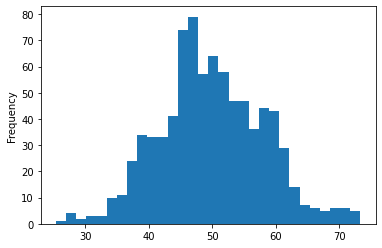

In [54]:
df.RSI.plot.hist(bins=30)

In [52]:
#RSI PETR4

rsi2 = RSIIndicator(close=df2['Close'],window=30)
df2['RSI'] = rsi2.rsi()

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(name='RSI',x=df.index, y=df2['RSI']), row=2, col=1)
fig.add_trace(go.Candlestick(name='PETR4',x=df.index, close=df2['Close'], open=df2['Open'],high=df2['High'], low=df2['Low']),row=1,col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='RSI PETR4')
fig.show()


###5.2.2. Oscilador estocástico

In [55]:
from ta.momentum import StochasticOscillator

In [56]:
so = StochasticOscillator(high= df['High'], low= df['Low'],close=df['Close'],window=14)
df['SO'] = so.stoch()

In [59]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(name='SO',x=df.index, y=df['SO']), row=2, col=1)
fig.add_trace(go.Candlestick(name='BRML3',x=df.index, close=df['Close'], open=df['Open'],high=df['High'], low=df['Low']),row=1,col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='SO BRML3' )
fig.show()

In [ ]:
#Oscilador estocastico WEG3

so3 = StochasticOscillator(high= df3['High'], low= df3['Low'],close=df3['Close'],window=14)
df3['SO'] = so3.stoch_signal()

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(name='SO',x=df3.index, y=df3['SO']), row=2, col=1)
fig.add_trace(go.Candlestick(name='WEGE3',x=df3.index, close=df3['Close'], open=df3['Open'],high=df3['High'], low=df3['Low']),row=1,col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='SO WEG3')
fig.show()

##5.3. Indicadores de volatilidade

###5.3.1. Bandas de Bollinger

In [ ]:
from ta.volatility import BollingerBands

In [ ]:
bb = BollingerBands(close=df['Close'], window=20, window_dev=2)
df['bb_bbm'] = bb.bollinger_mavg()
df['bb_bbh'] = bb.bollinger_hband()
df['bb_bbl'] = bb.bollinger_lband()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='MédiaMovel', x= df.index, y=df['bb_bbm']))
fig.add_trace(go.Candlestick(name='BRML3', x=df.index, close=df['Close'], open=df['Open'], high = df['High'], low=df['Low']))
fig.add_trace(go.Scatter(name='Banda Superior', x=df.index, y=df['bb_bbh']))
fig.add_trace(go.Scatter(name='Banda inferior', x=df.index, y=df['bb_bbl']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='Bollinger Bands')
fig.show()

In [ ]:
#BB para PETR4

bb2 = BollingerBands(close=df2['Close'], window=20, window_dev=2)
df2['bb_bbm'] = bb2.bollinger_mavg()
df2['bb_bbh'] = bb2.bollinger_hband()
df2['bb_bbl'] = bb2.bollinger_lband()


fig = go.Figure()
fig.add_trace(go.Scatter(name='MédiaMovel', x= df2.index, y=df2['bb_bbm']))
fig.add_trace(go.Candlestick(name='PETR4', x=df2.index, close=df2['Close'], open=df2['Open'], high = df2['High'], low=df2['Low']))
fig.add_trace(go.Scatter(name='Banda Superior', x=df2.index, y=df2['bb_bbh']))
fig.add_trace(go.Scatter(name='Banda inferior', x=df2.index, y=df2['bb_bbl']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='PETR4 Bollinger Bands')
fig.show()

###5.3.2. ATR - Average True Range

In [ ]:
from ta.volatility import AverageTrueRange

In [ ]:
atr = AverageTrueRange(df['High'], df['Low'], df['Close'])

df['ATR'] = atr.average_true_range()

In [ ]:
fig = make_subplots(rows=2,cols=1)
fig.add_trace(go.Scatter(name='ATR', x=df.index, y=df['ATR']), row=2, col=1)
fig.add_trace(go.Candlestick(name='BRML3', x=df.index, close=df['Close'], open=df['Open'], high = df['High'], low=df['Low']), row=1, col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text = 'ATR')
fig.show()

In [ ]:
#WEGE3 ATR

atr = AverageTrueRange(df3['High'], df3['Low'], df3['Close'])

df3['ATR'] = atr.average_true_range()

fig = make_subplots(rows=2,cols=1)
fig.add_trace(go.Scatter(name='ATR', x=df3.index, y=df3['ATR']), row=2, col=1)
fig.add_trace(go.Candlestick(name='BRML3', x=df.index, close=df3['Close'], open=df3['Open'], high = df3['High'], low=df3['Low']), row=1, col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text = 'WEGE3 ATR')
fig.show()

#5.4. Indicadores de tendência

Indicadores de tendência buscam captar sinais de um movimento direcional do preço do ativo

###5.4.1. MACD

In [ ]:
from ta.trend import MACD

In [ ]:
macd = MACD(df['Close'])
df['MACD_LINE'] = macd.macd()
df['MACD_DIFF'] = macd.macd_diff()


In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Bar(name='MACD', x=df.index, y=df['MACD_LINE']), row=2,col=1)
fig.add_trace(go.Scatter(name='MACD_DIFF', x=df.index, y=df['MACD_DIFF']), row=2, col=1)
fig.add_trace(go.Scatter(name='MACD_line', x=df.index, y=df['MACD_LINE']), row=2, col=1)
fig.add_trace(go.Candlestick(name='BRML3', x=df.index, close=df['Close'], open=df['Open'], high = df['High'], low=df['Low']),row=1,col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='MACD BRML3')
fig.show()

In [ ]:
macd2 = MACD(df['Close'])
df2['MACD_LINE'] = macd2.macd()
df2['MACD_DIFF'] = macd2.macd_diff()

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Bar(name='MACD', x=df2.index, y=df2['MACD_LINE']), row=2,col=1)
fig.add_trace(go.Scatter(name='MACD_DIFF', x=df2.index, y=df2['MACD_DIFF']), row=2, col=1)
fig.add_trace(go.Scatter(name='MACD_line', x=df2.index, y=df2['MACD_LINE']), row=2, col=1)
fig.add_trace(go.Candlestick(name='BRML3', x=df2.index, close=df2['Close'], open=df2['Open'], high = df2['High'], low=df2['Low']),row=1,col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='MACD WEGE3')
fig.show()

###5.4.2. Simple Moving Average

In [ ]:
from ta.trend import SMAIndicator

In [ ]:
sma_short = SMAIndicator(df['Close'], window=5)
sma_long = SMAIndicator(df['Close'], window=30)
df['SMA_SHORT'] = sma_short.sma_indicator()
df['SMA_LONG'] = sma_long.sma_indicator()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(name='SMA_SHORT', x=df.index, y=df['SMA_SHORT']))
fig.add_trace(go.Candlestick(name='BRML3', x=df.index, close=df['Close'], open=df['Open'], high = df['High'], low=df['Low']))
fig.add_trace(go.Scatter(name='SMA_LONG', x=df.index, y=df['SMA_LONG']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='Simple Moving Average')
fig.show()

###5.4.3. Média Móvel Exponencial - EMA

In [ ]:
from ta.trend import EMAIndicator

In [ ]:
ema_short = EMAIndicator(df3['Close'], window=5)
ema_long = EMAIndicator(df3['Close'], window=30)
df3['EMA_SHORT'] = ema_short.ema_indicator()
df3['EMA_LONG'] = ema_long.ema_indicator()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='EMA_SHORT', x=df3.index, y=df3['EMA_SHORT']))
fig.add_trace(go.Candlestick(name='WEGE3', x=df.index, close=df3['Close'], open=df3['Open'], high = df3['High'], low=df3['Low']))
fig.add_trace(go.Scatter(name='EMA_LONG', x=df3.index, y=df3['EMA_LONG']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='EMA WEGE3')
fig.show()

##5.5. Indicadores de Volume
Indicadores de volume baseiam-se na quantidade negociada buscando compreender como as forças vendedoras e compradoras influenciam no preço

###5.5.1. OBV - On Balance Volume

In [ ]:
from ta.volume import OnBalanceVolumeIndicator

In [ ]:
obv = OnBalanceVolumeIndicator(df2['Close'], df2['Volume'])
df2['OBV'] = obv.on_balance_volume()

In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Bar(name='OBV', x=df2.index, y=df2['OBV']), row=2, col=1)
fig.add_trace(go.Candlestick(name='PETR4', x=df.index, close=df2['Close'], open=df2['Open'], high=df2['High'], low=df2['Low']), row=1, col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='OBV PETR4')
fig.show()

###5.5.2. VWAP - Volume Weighted Average Price

In [ ]:
from ta.volume import VolumeWeightedAveragePrice

In [ ]:
vwap = VolumeWeightedAveragePrice(df['High'], df['Low'], df['Close'], df['Volume'])
df['VWAP'] = vwap.volume_weighted_average_price()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(name='VWAP', x=df.index, y=df['VWAP']))
fig.add_trace(go.Candlestick(name='BRML3', x=df.index, close=df['Close'], open=df['Open'], high=df['High'], low=df['Low']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='VWAP')
fig.show()